In [35]:
import re
import string
from nltk.tokenize import word_tokenize
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from scipy import interpolate


In [36]:
f = open("merged.out", "r")
raw_text = f.read() 
raw_text = ''.join(filter(lambda x: x in string.printable, raw_text))
f.close()

In [38]:
words = word_tokenize(raw_text.replace("’", "").replace("'", "").replace("-", ""))
words=[word.lower() for word in words if word.isalpha()]

In [82]:
len(words)

14006007

In [39]:
word_length = list(map(len, words))
np.mean(word_length)

4.854207269780745

Text(0, 0.5, 'Number of words')

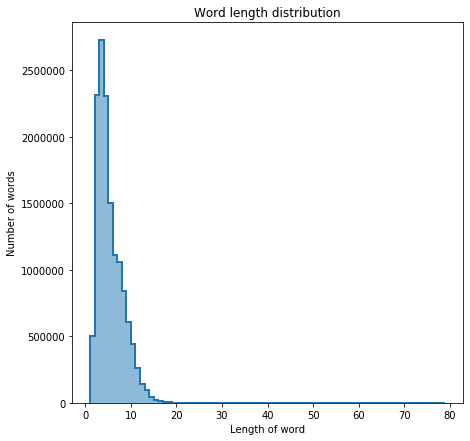

In [45]:
plt.figure(figsize=(7, 7))
plt.hist(word_length, bins = range(1, 80), alpha=0.5, color="C0")
plt.hist(word_length, bins = range(1, 80), histtype="step", color="C0", linewidth=2)
plt.title("Word length distribution")
plt.xlabel("Length of word")
plt.ylabel("Number of words")

In [47]:
f = open("hashes/wordlist.txt")
unique = f.read().split('\n')[:-1]
f.close()

In [48]:
unique_length = list(map(len, unique))

Text(0, 0.5, 'Number of words')

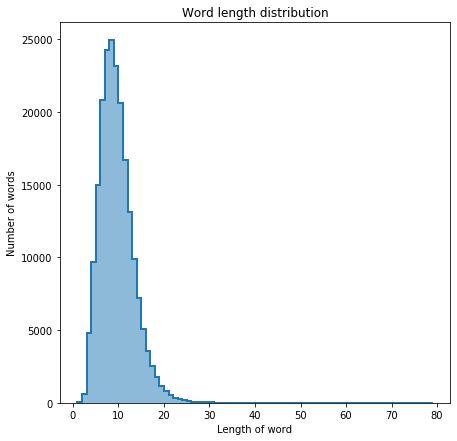

In [50]:
plt.figure(figsize=(7, 7))
plt.hist(unique_length, bins = range(1, 80), alpha=0.5, color="C0")
plt.hist(unique_length, bins = range(1, 80), histtype="step", color="C0", linewidth=2)
plt.title("Word length distribution")
plt.xlabel("Length of word")
plt.ylabel("Number of words")

In [51]:
len(unique)

207725

In [53]:
np.mean(unique_length)

9.151989409074497

In [2]:
def loadHashData(filename):
    file = open("hashes/"+filename, "r")
    raw = file.read()
    file.close()
    
    nums = list(map(int, raw.split('\n')[:-1]))
    
    return nums

In [3]:
crc32 = loadHashData("crc32.txt")
joaat = loadHashData("joaat.txt")
strlen = loadHashData("strlen.txt")
asciisumstrlen = loadHashData("asciisumstrlen.txt")
rollhash = loadHashData("roll.txt")
asciisum = loadHashData("asciisum.txt")

In [4]:
def movingaverage (values, window):
    values = np.concatenate((np.repeat(np.array([values[0]]), window - 1), values))
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

In [5]:
def plothist(arr, label, alpha, color):
    plt.hist(range(len(arr)), bins = range(0, len(arr), 10), weights = arr, alpha=alpha, label=label, color=color)
    plt.hist(range(len(arr)), bins = range(0, len(arr), 10), weights = arr, histtype = "step", linewidth=2, color=color)

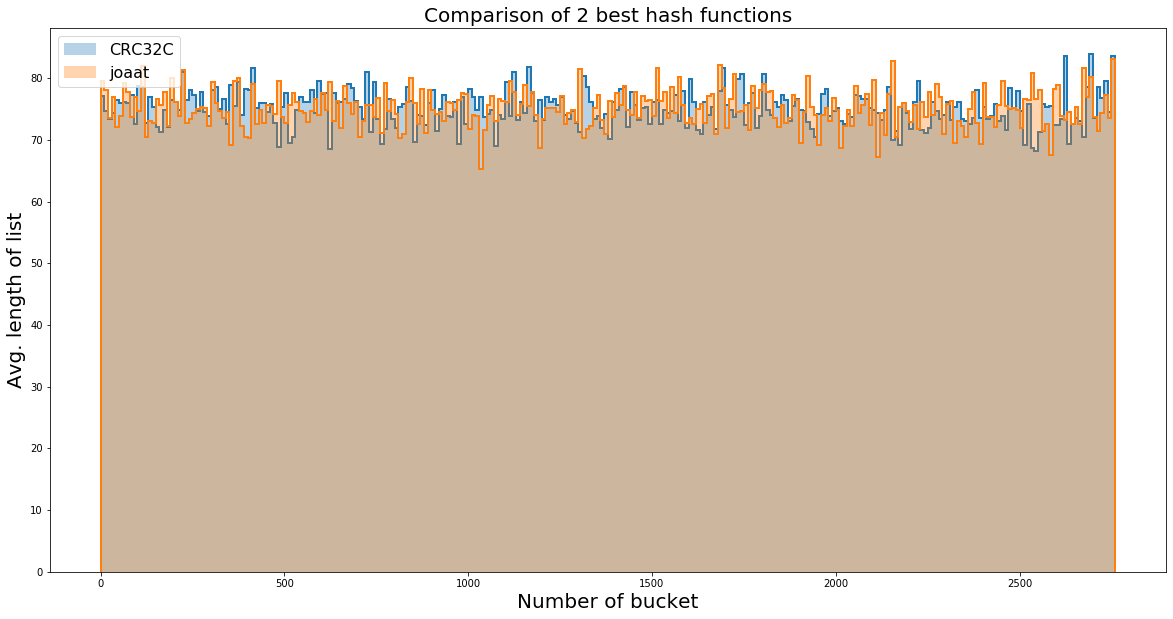

In [54]:
plt.figure(figsize=(20,10))
plt.yticks(ticks = range(0, 1000, 100), labels = range(0, 100, 10))
plothist(crc32, "CRC32C", 0.33, "C0")
plothist(joaat, "joaat", 0.33, "C1")
#plothist(rollhash, "rolling", 0.33, "C2")

plt.xlabel("Number of bucket", size=20)
plt.ylabel("Avg. length of list", size = 20)
plt.title("Comparison of 2 best hash functions", size=20)
plt.legend(loc = 2, prop={"size": 16})

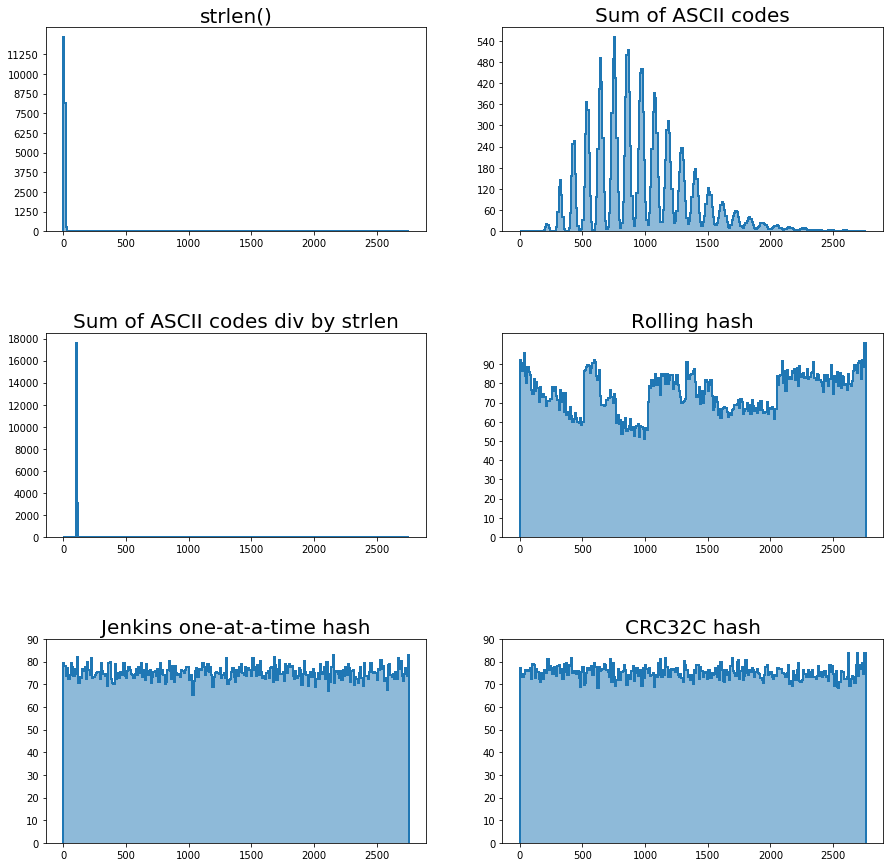

In [32]:
plt.figure(figsize=(15,15))

plt.subplot(3, 2, 1)
plt.title("strlen()", size=20)
plothist(strlen, "strlen", 0.5, "C0")
plt.yticks(ticks = range(0, 125000, 12500), labels = range(0, 12500, 1250))

plt.subplot(3, 2, 2)
plothist(asciisum, "ASCII sum", 0.5, "C0")
plt.title("Sum of ASCII codes", size=20)
plt.yticks(ticks = range(0, 6000, 600), labels = range(0, 600, 60))

plt.subplot(3, 2, 3)
plothist(asciisumstrlen, "asciistrlen", 0.5, "C0")
plt.title("Sum of ASCII codes div by strlen", size=20)
plt.yticks(ticks = range(0, 200000, 20000), labels = range(0, 20000, 2000))


plt.subplot(3, 2, 4)
plothist(rollhash, "roll", 0.5, "C0")
plt.title("Rolling hash", size=20)
plt.yticks(ticks = range(0, 1000, 100), labels = range(0, 100, 10))

plt.subplot(3, 2, 5)
plothist(joaat, "joaat", 0.5, "C0")
plt.title("Jenkins one-at-a-time hash", size=20)
plt.yticks(ticks = range(0, 1000, 100), labels = range(0, 100, 10))

plt.subplot(3, 2, 6)
plothist(crc32, "CRC32C", 0.5, "C0")
plt.title("CRC32C hash", size=20)
plt.yticks(ticks = range(0, 1000, 100), labels = range(0, 100, 10))

plt.subplots_adjust(hspace=0.5)

([<matplotlib.axis.XTick at 0x7fa613e6e190>,
 <a list of 10 Text xticklabel objects>)

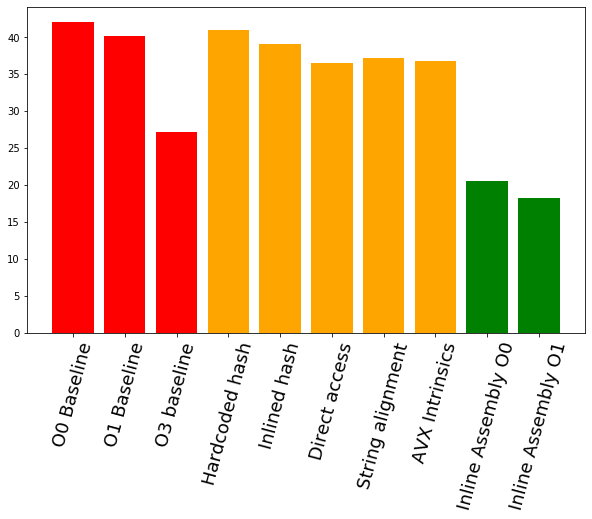

In [78]:
plt.figure(figsize=(10,6))
plt.bar((0, 1, 2, 3, 4, 5, 6, 7, 8, 9), (41.998, 40.063, 27.107, 40.967, 39.056, 36.526, 37.089, 36.758, 20.502, 18.155), color=["red", "red", "red", "orange", "orange", "orange", "orange", "orange", "green", "green"])
plt.xticks(ticks=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9), labels=("O0 Baseline", "O1 Baseline", "O3 baseline", "Hardcoded hash", "Inlined hash", "Direct access", "String alignment", "AVX Intrinsics", "Inline Assembly O0", "Inline Assembly O1"), rotation=75, size=18)



| |Final -O0|Final -O1|
|-----------|---------|--------|
|-O0 Baseline|2.048|2.313|
|-O1 Baseline|1.954|2.207|
|-O3 Baseline|1.322|1.493|
|Hardcoded Hash|1.998|2.257|
|Inlined Hash|1.905|2.151|
|Direct access|1.782|2.011|
|String alignment|1.809|2.043|
|AVX Intrinsics|1.792|2.025|


In [83]:
41/18

2.2777777777777777